# First attempt to generate Marathi names 

Machine learning is way of develop algorithms to learn different task by trying and mimicking whatever input we would give during training phase.
In this notebook, we attempt to create algorithm which generate meaningful human name in Marathi laguage. Algorithm we attempt to develop should understand way to generate Marathi names in Devnagari script.

We are using all training and validation dataset created with 'Marathi-Data-Processing' notebook.

As a first step, we will load names data in notebook environment and create list of those names.

In [1]:
words = open('names.txt', 'r').read().splitlines()
more_words = open('more_names.txt', 'r').read().splitlines()

In [2]:
words1 = [word.strip() for word in words]
words1.extend([word.strip() for word in more_words])
words = list(set(words1))

There are aroung 11000+ names available for training.

In [3]:
len(words)

11507

We are attempting to develop character based name generation model which use Devnagari script. Hence we need to find basic Devnagari characters. There are 65 basic Devnagari charecters present in dataset.

In [4]:
len(set([char for word in words for char in word]))

65

In [5]:
min(len(w) for w in words)

1

In [6]:
max(len(w) for w in words)

37

As a part of creation of training set, we will creating Bi-grams from name dataset. Here bi-gram contains all combinations of two charecters adjacent to each other. We also keep a track of count of all valid bi-grams.

In [7]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [8]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('ा', '<E>'), 2096),
 (('न', '्'), 1505),
 (('<S>', 'स'), 1341),
 (('ि', '<E>'), 1298),
 (('्', 'र'), 1234),
 (('र', '<E>'), 1143),
 (('न', '<E>'), 1133),
 (('र', '्'), 955),
 (('<S>', 'म'), 894),
 (('<S>', 'अ'), 772),
 (('<S>', 'र'), 753),
 (('्', 'द'), 722),
 (('ल', '<E>'), 718),
 (('<S>', 'प'), 709),
 (('<S>', 'क'), 690),
 (('त', '<E>'), 625),
 (('<S>', 'न'), 622),
 (('्', 'व'), 592),
 (('र', 'ि'), 587),
 (('ि', 'न'), 564),
 (('<S>', 'ब'), 564),
 (('्', 'त'), 551),
 (('<S>', 'ज'), 539),
 (('<S>', 'श'), 524),
 (('न', 'ि'), 519),
 (('श', '<E>'), 507),
 (('द', '्'), 500),
 (('म', '<E>'), 481),
 (('न', 'ा'), 470),
 (('्', 'य'), 457),
 (('<S>', 'व'), 449),
 (('म', '्'), 441),
 (('व', 'ि'), 430),
 (('्', 'म'), 427),
 (('ु', '<E>'), 424),
 (('र', 'ा'), 419),
 (('स', '्'), 417),
 (('<S>', 'द'), 407),
 (('ि', 'त'), 398),
 (('क', '्'), 398),
 (('त', 'ि'), 398),
 (('ल', '्'), 395),
 (('त', '्'), 394),
 (('ि', 'र'), 394),
 (('्', 'न'), 391),
 (('प', '्'), 378),
 (('द', '<E>'), 369),
 (('<S>',

We need to keep a track of bi-gram combination with count, one way to do that is create matrix N of size of (no. of charecter * no. of charecter). N[row,column] will give count/probability of bi-gram combination.

In [9]:
import torch

In [13]:
N = torch.zeros((66, 66), dtype=torch.int32)

We are working on text/charecter data hence we need to convert it into numerical data as algorithms are more friendly with numbers. 
We are creating charecter - charecter no. and reverse maps as given below.

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

We are iterating with all words in training dataset and calculate count/probability matrix.

In [15]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

Following code will create heatmap for bi-gram combination with help of count/probablity matrix.
For Devnagari support we are using Mangal.ttf [font property file](https://hindi-fonts.com/fonts/mangal-regular).

/Users/aadya/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/Users/aadya/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/Users/aadya/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aadya/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


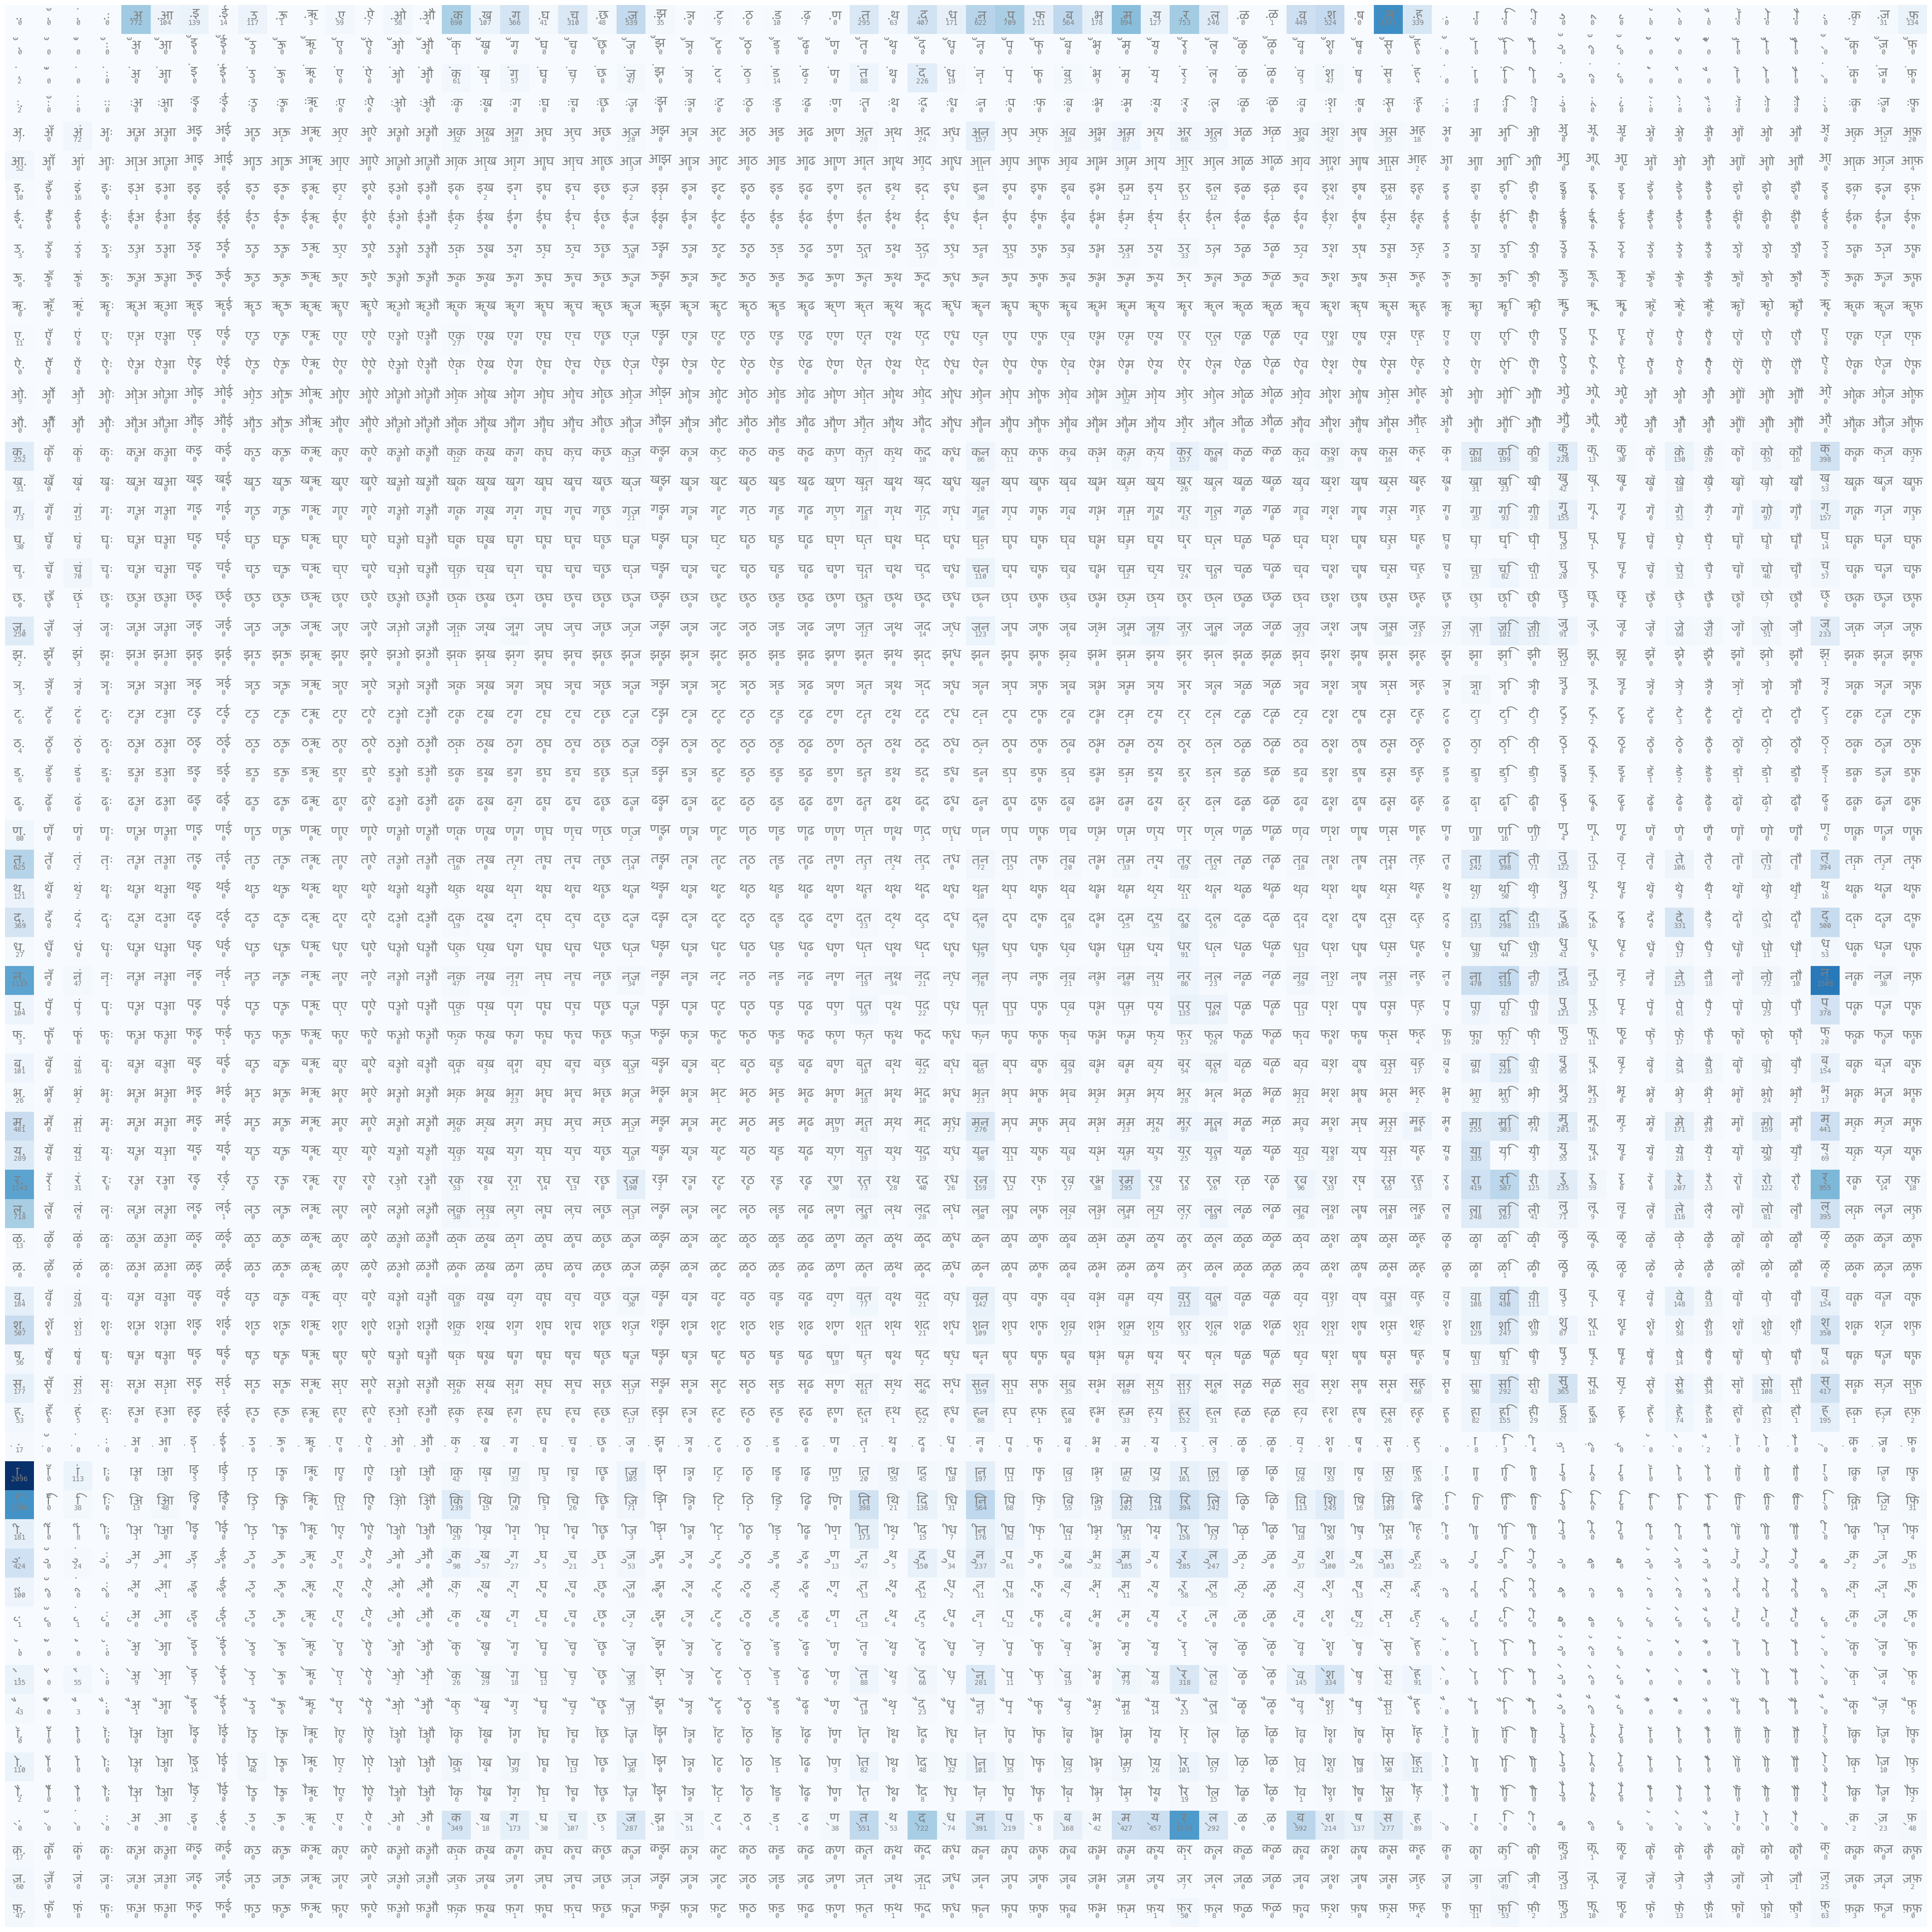

In [55]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties


font_prop = FontProperties(fname='./Mangal/Mangal.ttf', size=18)

%matplotlib inline



plt.figure(figsize=(50,50))
plt.imshow(N, cmap='Blues')

for i in range(66):
    for j in range(66):
        chstr = itos[i] + itos[j]
        #print(chstr)
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray', fontproperties=font_prop)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

This is count statistics for bigram that starts with  ., where . is initial charecter.

In [19]:
N[0]

tensor([   0,    0,    0,    0,  772,  104,  139,   14,  117,    1,    3,   59,
           7,   58,    4,  690,  107,  366,   41,  310,   48,  539,   35,    0,
           9,    6,   10,    7,    0,  295,   63,  407,  171,  622,  709,  211,
         564,  178,  894,  127,  753,  246,    0,    1,  449,  524,    0, 1341,
         339,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    2,   31,  134], dtype=torch.int32)

Here we are calculating probablities of word combinations starts with '.' i.e. starting word introduce in charecter set for our conviniece.

In [20]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7090e-02, 9.0380e-03,
        1.2080e-02, 1.2167e-03, 1.0168e-02, 8.6904e-05, 2.6071e-04, 5.1273e-03,
        6.0833e-04, 5.0404e-03, 3.4761e-04, 5.9964e-02, 9.2987e-03, 3.1807e-02,
        3.5630e-03, 2.6940e-02, 4.1714e-03, 4.6841e-02, 3.0416e-03, 0.0000e+00,
        7.8213e-04, 5.2142e-04, 8.6904e-04, 6.0833e-04, 0.0000e+00, 2.5637e-02,
        5.4749e-03, 3.5370e-02, 1.4861e-02, 5.4054e-02, 6.1615e-02, 1.8337e-02,
        4.9014e-02, 1.5469e-02, 7.7692e-02, 1.1037e-02, 6.5438e-02, 2.1378e-02,
        0.0000e+00, 8.6904e-05, 3.9020e-02, 4.5537e-02, 0.0000e+00, 1.1654e-01,
        2.9460e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7381e-04, 2.6940e-03, 1.1645e-02])

we will use [Generator](https://pytorch.org/docs/stable/generated/torch.Generator.html) object in Pytorch to generate bi-gram distribution based data, following snippet shows use of generator.

In [21]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

We are using [multinomial](https://pytorch.org/docs/stable/generated/torch.multinomial.html) for generating data accoding to bi-gram dataset distribution.
This will help us to get next most probable charecter as per data distribution.

In [22]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [23]:
p.shape

torch.Size([3])

Here we are calculation probability matrix from count matrix.

In [24]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [25]:
P.shape

torch.Size([66, 66])

In [26]:
P.sum(1, keepdim=True).shape

torch.Size([66, 1])

In [27]:
P.sum(1).shape

torch.Size([66])

We have done with initial name generator with following code.
Right now it follows distribution of training dataset. It generate some what gibberish data.

In [28]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

युर.
अह्गुरिद्र्ल्यन्गुलरिर.
न्तन.
अरा.
सिर्तेरम.


To check quality of result, we need some metrics.
Log likelihood will be one of good metric which check quality of prediction.

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
print(n)

log_likelihood=tensor(-207337.8281)
nll=tensor(207337.8281)
2.708315849304199
76556


Now we are ready for our first ML adventure which generate Marathi names. Here we will use logistic regression like algorithm. Hence we are creating input and probable output dataset i.e. in bi-gram first charecter will be input and next character will be probable output.

In [30]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. स
स ु
ु म
म ि
ि त
त ा
ा .


In [31]:
xs

tensor([ 0, 47, 53, 38, 51, 29, 50])

In [32]:
ys

tensor([47, 53, 38, 51, 29, 50,  0])

We are encoding charecter in to one hot encoding having 66 class i.e. 65 Devnagari charecter and . is terminal charecter.

In [33]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=66).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.,

In [34]:
xenc.shape

torch.Size([7, 66])

Following image shows pictorial representation of word with one hot encoding.

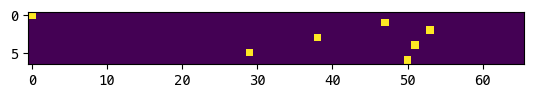

In [35]:
plt.imshow(xenc)

In [36]:
xenc.dtype

torch.float32

In next node, we assign random weights which will use in prediction. Fine tuned value of weight with respect to dataset may generate meaningful name.

In [37]:
W = torch.randn((66, 1))
xenc @ W

tensor([[ 1.1028],
        [ 0.2549],
        [-1.4032],
        [-0.8799],
        [ 1.5942],
        [ 0.4795],
        [-0.2537]])

In [38]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

we are now creating generator for weights, using seed value to generate same results for multiple runs.

In [39]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((66, 66), generator=g)

This code seems like single layer of neurons, who analyze input it get predicted next charecter by providing probability values. 

In [40]:
xenc = F.one_hot(xs, num_classes=66).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [41]:
probs.shape

torch.Size([7, 66])

For multiple dataset tuples we check our metric calculation.

In [42]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .स (indexes 0,47)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0386, 0.0064, 0.0078, 0.0027, 0.0107, 0.0078, 0.0017, 0.0148, 0.0087,
        0.0199, 0.0050, 0.0177, 0.0058, 0.0052, 0.0318, 0.1514, 0.0384, 0.0016,
        0.0159, 0.0035, 0.0216, 0.0069, 0.0018, 0.0126, 0.0075, 0.0978, 0.0929,
        0.0041, 0.0024, 0.0109, 0.0028, 0.0167, 0.0085, 0.0298, 0.0036, 0.0034,
        0.0013, 0.0282, 0.0024, 0.0272, 0.0031, 0.0064, 0.0057, 0.0112, 0.0021,
        0.0248, 0.0146, 0.0127, 0.0085, 0.0014, 0.0090, 0.0180, 0.0138, 0.0025,
        0.0093, 0.0030, 0.0118, 0.0129, 0.0032, 0.0037, 0.0092, 0.0065, 0.0028,
        0.0017, 0.0206, 0.0033])
label (actual next character): 47
probability assigned by the net to the the correct character: 0.012742719613015652
log likelihood: -4.362795352935791
negative log likelihood: 4.362795352935791
--------
bigram example 2: सु (indexes 47,53)
input to the neural net: 47
output probabilities fro

Now layer by layer, we are developing our training loop. First we are assinging random weights.

In [43]:
# randomly initialize 66 neurons' weights. each neuron receives 66 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((66, 66), generator=g, requires_grad=True)

Then we test forward pass with following steps.
* Calculate one hot encodings for input data matrix.
* Multiply weights with input one hot encoding matrix.
* This multiplication is seen as log-counts, by exponentiate we get count equievalent of matrix N
* We can calculate probability matrix by dividing each value in row by sum of row in N.
* loss will be mean of log of likelihood probability calculated in last step

In [45]:
# forward pass
xenc = F.one_hot(xs, num_classes=66).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(7), ys].log().mean()

In [46]:
print(loss.item())

4.449385643005371


This is a backward pass with weight upgradation.

In [47]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()


In [48]:
W.data += -0.1 * W.grad

Once testing our training loop in parts we can go further to develop Neural Network based Name predictor.

In [50]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((66, 66), generator=g, requires_grad=True)

number of examples:  76556


This is complete gradient descent based training loop. We will keep a track of loss value.

In [51]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=66).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

4.672059059143066
4.3799004554748535
4.139827251434326
3.9505412578582764
3.8098020553588867
3.704216957092285
3.62089467048645
3.5517420768737793
3.492655038833618
3.441411256790161
3.3966000080108643
3.357189655303955
3.3223507404327393
3.291388750076294
3.263720750808716
3.238862991333008
3.2164149284362793
3.196042537689209
3.1774649620056152
3.1604461669921875
3.1447856426239014
3.13031268119812
3.1168837547302246
3.1043787002563477
3.0926945209503174
3.0817453861236572
3.0714569091796875
3.0617666244506836
3.0526199340820312
3.0439696311950684
3.0357744693756104
3.0279972553253174
3.0206055641174316
3.01357102394104
3.006865978240967
3.000467538833618
2.994354009628296
2.988506317138672
2.982905626296997
2.977536678314209
2.972384452819824
2.9674344062805176
2.9626753330230713
2.958095073699951
2.953683376312256
2.9494307041168213
2.9453272819519043
2.941366195678711
2.9375386238098145
2.933837652206421
2.9302568435668945
2.926790475845337
2.9234323501586914
2.920177936553955
2.9

You can see result of our initial attempt, it is still return some gibberish value.

In [52]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=66).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

र्र.
अूी.
मुरालिलैफ़सल्गुलयहेघढि.
त.
अरा.
